In [13]:
import ee
#ee.Authenticate()
ee.Initialize()
#print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())
import geemap
import folium
import rasterio
from matplotlib import pyplot
from osgeo import gdal
import os

### Long Beach Ship Detection

In [7]:
# Create a default map
Map = geemap.Map()

# Load an image.
image = ee.Image(ee.ImageCollection('LANDSAT/LC8_L1T_8DAY_TOA').first())

# Create an NDWI image, define visualization parameters and display.
ndwi = image.normalizedDifference(['B3', 'B5'])
ndwiViz = {'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}
Map.setCenter(-122.1899, 37.5010, zoom=10)  # LA
Map.addLayer(ndwi, ndwiViz, 'NDWI', False)

# Display the map
Map


Map(center=[37.501, -122.1899], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

### Saving Image

In [34]:
ee.Image("LANDSAT/LC08/C01/T1/LC08_044034_20140318").select('B2').projection().getInfo()

{'type': 'Projection',
 'crs': 'EPSG:32610',
 'transform': [30, 0, 460785, 0, -30, 4264215]}

In [35]:
raw = ee.Image("LANDSAT/LC08/C01/T1/LC08_044034_20140318").select("B4","B3","B2")
coord = ee.Geometry.Rectangle(33.75599777953796, -118.28713097440811,33.69432004321109, -118.16404976872677)
projection = raw.select('B2').projection().getInfo()

In [43]:
task = ee.batch.Export.image.toDrive(**{
    "image":raw,
    "description": "test",
    "folder" :"GEE_Images",
    "scale" : 30,
    "region" : coord.getInfo()["coordinates"],
    "maxPixels": 1e12
})

In [44]:
task.start()

In [45]:
coordUCSD = ee.Geometry.Rectangle(32.88184783597174, -117.23838846877605,32.880478306981615, -117.23652165132586)

In [50]:
task2 = ee.batch.Export.image.toDrive(**{
    "image":raw,
    "description": "testUCSD",
    "folder" :"GEE_Images",
    "scale" : 30,
    "region" : coordUCSD.getInfo()["coordinates"],
    "maxPixels": 1e12
})

In [51]:
task2.start()

In [59]:
taskAsset = ee.batch.Export.image.toAsset(**{
    "image":raw,
    "description": "testUCSDAsset",
    "scale" : 30,
    "region" : coordUCSD.getInfo()["coordinates"],
    "maxPixels": 1e12,
    "assetId": 'projects/alexmak/assets/testUCSD'
})

In [60]:
taskAsset.start()

In [23]:
raw = ee.Image("LANDSAT/LC08/C01/T1/LC08_044034_20140318").select("B4","B3","B2")
coordLAport = ee.Geometry.Rectangle(33.64246038322455, -118.32027994564326,33.78867573774964, -118.07789408138545)

In [24]:
task3 = ee.batch.Export.image.toDrive(**{
    "image":raw,
    "description": "laport",
    "folder" :"GEE_Images",
    "scale" : 50,
    "region" : coordLAport.getInfo()["coordinates"],
    "maxPixels": 1e12
})

In [25]:
task3.start()

### Opening TIF Files

In [4]:
dataset = rasterio.open('/home/alex/school/tif/testUCSD-0000000000-0000000000.tif')
dataset

<open DatasetReader name='/home/alex/school/tif/testUCSD-0000000000-0000000000.tif' mode='r'>

In [10]:
dataset.read().shape

(3, 26880, 26880)

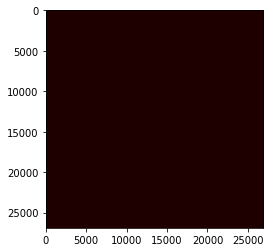

In [7]:
pyplot.imshow(dataset.read(1), cmap='pink')

pyplot.show()

#### Combine all TIF files

In [14]:
tifDir = "/home/alex/school/tif"

In [16]:
allFiles = os.listdir(tifDir)
allFiles[0]

'testUCSD-0000053760-0000000000.tif'

In [17]:
command = "gdal_merge.py -o allmerge.tf "

In [20]:
allFiles = " ".join(allFiles)

In [21]:
os.system(command + allFiles)

ERROR 4: testUCSD-0000053760-0000000000.tif: No such file or directory
ERROR 4: testUCSD-0000053760-0000026880.tif: No such file or directory
ERROR 4: testUCSD-0000000000-0000000000.tif: No such file or directory
ERROR 4: testUCSD-0000080640-0000000000.tif: No such file or directory
ERROR 4: testUCSD-0000134400-0000053760.tif: No such file or directory
ERROR 4: testUCSD-0000268800-0000000000.tif: No such file or directory
ERROR 4: testUCSD-0000134400-0000026880.tif: No such file or directory
ERROR 4: testUCSD-0000026880-0000053760.tif: No such file or directory
ERROR 4: testUCSD-0000080640-0000053760.tif: No such file or directory
ERROR 4: testUCSD-0000268800-0000026880.tif: No such file or directory
ERROR 4: testUCSD-0000000000-0000053760.tif: No such file or directory
ERROR 4: testUCSD-0000134400-0000000000.tif: No such file or directory
ERROR 4: testUCSD-0000241920-0000000000.tif: No such file or directory
ERROR 4: testUCSD-0000107520-0000026880.tif: No such file or directory
ERROR 

34304